In [1]:
import matplotlib.pyplot as plt
import pickle

# 12 qubit state preparation

In [4]:
with open("sp12.pickle", "rb") as f: 
    cost_data, circs = pickle.load(f)

Text(0.5, 1.0, '$n=12$, $\\theta=0.35\\pi$')

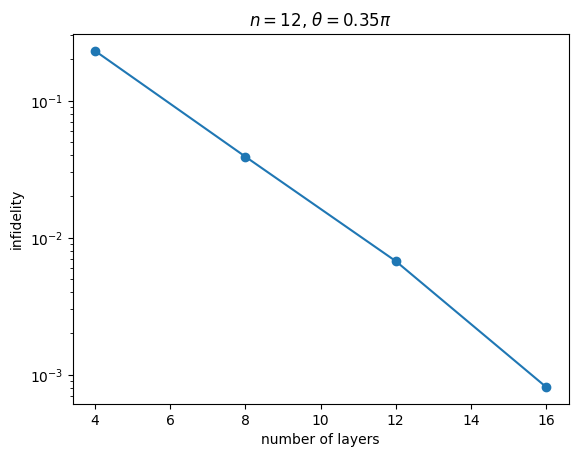

In [13]:
plt.plot([4,8,12,16], [c[-1] for c in cost_data], '-o')
plt.xlabel("number of layers")
plt.ylabel("infidelity")
plt.yscale('log')
plt.title(r'$n=12$, $\theta=0.35\pi$')

# 24 qubit state preparation

In [2]:
import os, sys
CURRENT_DIR = os.getcwd()
SRC_DIR = os.path.abspath(os.path.join(CURRENT_DIR, "..", "src"))
sys.path.append(SRC_DIR)
from main import *
from qaravan.tensorQ import StatevectorSim
import matplotlib.pyplot as plt

In [3]:
row_layout = [{'num_cells': 3, 'shift': 0.0}, 
              {'num_cells': 4, 'shift': -0.5}, 
              {'num_cells': 3, 'shift': 0.0}, 
              {'num_cells': 2, 'shift': 0.5}]
sp = [0,1,6,7,9,11,30,32,34,35,19,20]
ham = interp_ham(row_layout, sp, 0.35 * np.pi)

with open("gs24.pickle", "rb") as f: 
    gs = pickle.load(f)

ge = (gs.conj().T @ ham_action(ham.grouped_terms(), gs)).real

In [9]:
depths = [8, 16, 24, 32, 40, 48, 56]
local_infidelities = []
circs = []

for depth in depths: 
    with open(f"sp24_{depth}.pickle", "rb") as f: 
        cost_data, circ = pickle.load(f)
        
        sq_infidelity = cost_data[-1]
        fidelity = (1-sq_infidelity)**2
        local_fidelity = fidelity**(1/24)
        local_infidelity = 1-local_fidelity

        local_infidelities.append(local_infidelity)
        circs.append(circ)

In [10]:
energies = []
sv_list = []
for circ in circs: 
    sim = StatevectorSim(circ)
    sv = sim.run(progress_bar=True).reshape(2**24)
    energy = sv.conj().T @ ham_action(ham.grouped_terms(), sv)
    energies.append(energy.real)
    sv_list.append(sv)

100%|██████████| 38/38 [00:48<00:00,  1.27s/it]


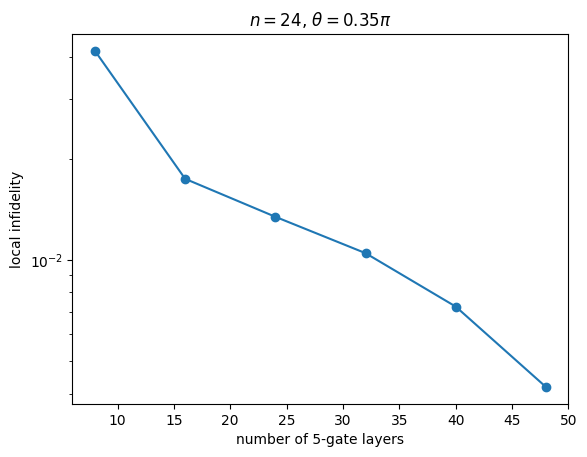

In [14]:
plt.plot(depths[:-1], local_infidelities[:-1], '-o', label='cost')
plt.xlabel("number of 5-gate layers")
plt.ylabel("local infidelity")
plt.yscale('log')
plt.title(r'$n=24$, $\theta=0.35\pi$')
plt.savefig("plot2.pdf", bbox_inches='tight')

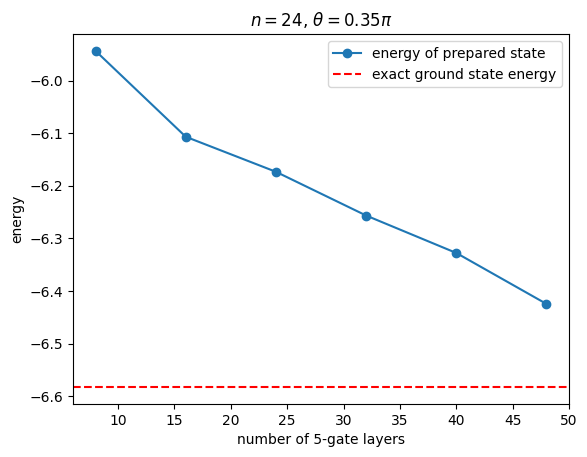

In [15]:
plt.plot(depths[:-1], energies[:-1], '-o', label='energy of prepared state')
plt.axhline(y=ge, color='r', linestyle='--', label='exact ground state energy')
plt.xlabel("number of 5-gate layers")
plt.ylabel("energy")
plt.title(r'$n=24$, $\theta=0.35\pi$')
plt.legend()

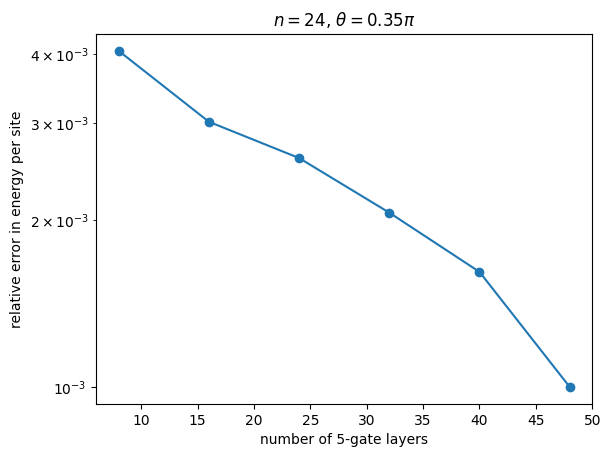

In [22]:
plt.plot(depths[:-1], np.abs((np.array(energies[:-1])-ge)/ge)/(24), '-o')
plt.xlabel("number of 5-gate layers")
plt.ylabel("relative error in energy per site")
plt.yscale('log')
plt.title(r'$n=24$, $\theta=0.35\pi$')
plt.savefig("plot3.pdf", bbox_inches='tight')

In [27]:
rel_energy_err_per_site = np.abs((np.array(energies[:-1])-ge)/ge)/(24)

In [18]:
A = [16, 17, 18]
B = [9, 10, 11]
C = [6, 7, 8]
true_tee = top_entropy(gs, [A,B,C])

compiled_tee = [top_entropy(compiled_sv, [A,B,C]) for compiled_sv in sv_list]
#compiled_infidelities = [1-np.abs(gs.conj().T @ compiled_sv)**(2/24) for compiled_sv in sv_list]

#noise_rates = [1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1]
#synthetic_gs_list = [gs + np.random.normal(0, rate, gs.shape) + 1.j * np.random.normal(0, rate, gs.shape) for rate in noise_rates]
#synthetic_gs_list = [gs/np.linalg.norm(gs) for gs in synthetic_gs_list]
#synthetic_tee = [top_entropy(gs, [A,B,C]) for gs in synthetic_gs_list]
#synthetic_infidelities = [1-np.abs(approx_gs.conj().T @ gs)**(2/24) for approx_gs in synthetic_gs_list]

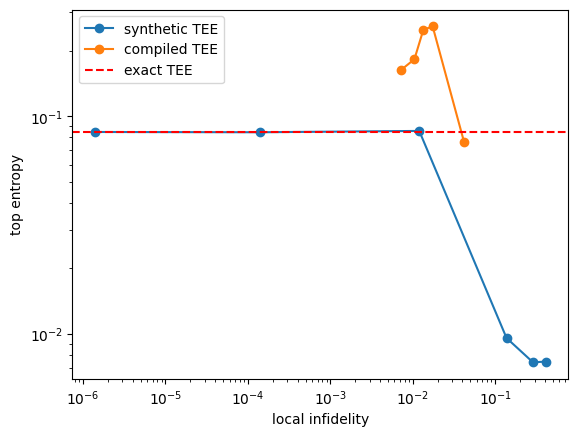

In [94]:
plt.plot(synthetic_infidelities, [-tee for tee in synthetic_tee], '-o', label='synthetic TEE')
plt.plot(compiled_infidelities[:-2], [-tee for tee in compiled_tee][:-2], '-o', label='compiled TEE')
plt.axhline(y=-true_tee, color='r', linestyle='--', label='exact TEE')
plt.xlabel("local infidelity")
plt.ylabel("top entropy")
plt.xscale('log')
plt.yscale('log')
plt.legend()

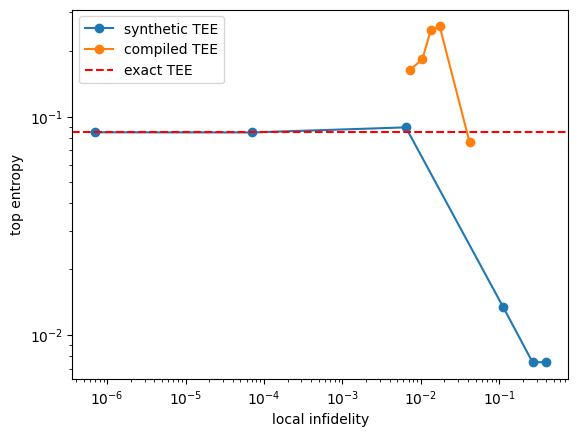

In [91]:
plt.plot(synthetic_infidelities, [-tee for tee in synthetic_tee], '-o', label='synthetic TEE')
plt.plot(compiled_infidelities[:-2], [-tee for tee in compiled_tee][:-2], '-o', label='compiled TEE')
plt.axhline(y=-true_tee, color='r', linestyle='--', label='exact TEE')
plt.xlabel("local infidelity")
plt.ylabel("top entropy")
plt.xscale('log')
plt.yscale('log')
plt.legend()

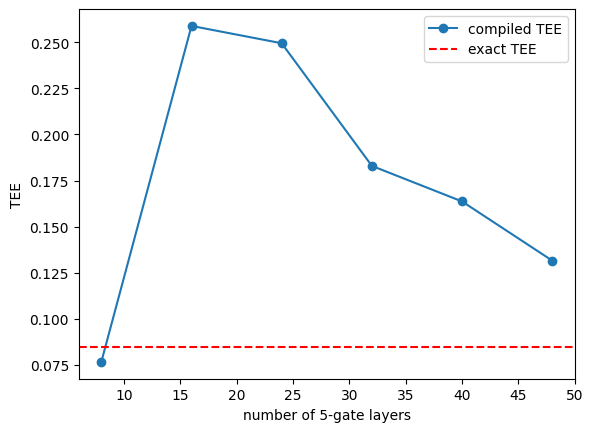

In [23]:
plt.plot(depths[:-1], [-tee for tee in compiled_tee[:-1]], '-o', label='compiled TEE')
plt.axhline(-true_tee, color='r', linestyle='--', label='exact TEE')
plt.ylabel("TEE")
plt.xlabel("number of 5-gate layers")
plt.legend()
plt.savefig("plot4.pdf", bbox_inches='tight')

In [1]:
depths[:-1], local_infidelities[:-1]

NameError: name 'depths' is not defined

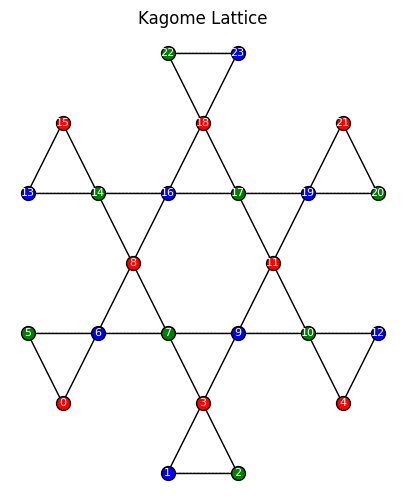

In [32]:
ham.lattice.plot(save_path="lattice24.pdf")

In [ ]:
with open("plot4.txt", "w") as f:
    for depth, infidelity, energy, tee in zip(depths, local_infidelities, rel_energy_err_per_site, tees):
        f.write(f"{depth} {tee}\n") 

In [13]:
true_tee = -0.08470933343414444

In [6]:
with open("data24.txt", "r") as f:
    lines = f.readlines()
    for line in lines:
        print(line.strip())

8 0.04178943435736804 0.004043344609978129 0.07641906231414364
16 0.017408176487370253 0.0030103202226923584 0.2590006308244668
24 0.013424976677387845 0.0025887707817883856 0.24958274270326974
32 0.010466032710680251 0.0020625221515667464 0.1829423798336567
40 0.007260210507443854 0.0016120330864832979 0.16362359912147362
48 0.0041883746538008415 0.0009987967550600296 0.1314599627690507


In [9]:
depths = [8,16,24,32,40,48]
local_infidelities = [0.04178943435736804, 0.017408176487370253, 0.013424976677387845, 0.010466032710680251, 0.007260210507443854, 0.0041883746538008415]
rel_energy_err_per_site = [0.004043344609978129, 0.0030103202226923584, 0.0025887707817883856, 0.0020625221515667464, 0.0016120330864832979, 0.0009987967550600296]
tees = [0.07641906231414364, 0.2590006308244668, 0.24958274270326974, 0.1829423798336567, 0.16362359912147362, 0.1314599627690507]

In [14]:
with open("plot4.txt", "w") as f:
    f.write(" ".join(map(str, depths)) + "\n")
    f.write(" ".join(map(str, tees)) + "\n")
    # write true_tee a single float
    f.write(f"{true_tee}\n")